In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers

In [23]:
data = load_iris()
X = data.data
y = data.target

In [24]:
scaler = StandardScaler()

In [25]:
X_scaler = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=42,stratify=y)

In [27]:
model = models.Sequential([
    layers.InputLayer(shape=(X_train.shape[1],)),
    layers.Dense(16,activation='relu'),
    layers.Dense(8,activation='relu'),
    layers.Dense(3,activation='softmax'),
])

In [29]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=8,verbose=1)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9580 - loss: 0.0785 - val_accuracy: 0.9333 - val_loss: 0.1398
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.0742 - val_accuracy: 0.9333 - val_loss: 0.1371
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9713 - loss: 0.0830 - val_accuracy: 0.9333 - val_loss: 0.1356
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9526 - loss: 0.1019 - val_accuracy: 0.9333 - val_loss: 0.1347
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9725 - loss: 0.0682 - val_accuracy: 0.9333 - val_loss: 0.1337
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9517 - loss: 0.0863 - val_accuracy: 0.9333 - val_loss: 0.1326
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9771 - loss: 0.0736 - val_accuracy: 0.9333 - val_loss: 0.1319
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9346 - loss: 0.1092 - val_accuracy: 0.9333 - v

In [33]:
loss,acc = model.evaluate(X_test,y_test,verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9333 - loss: 0.1016


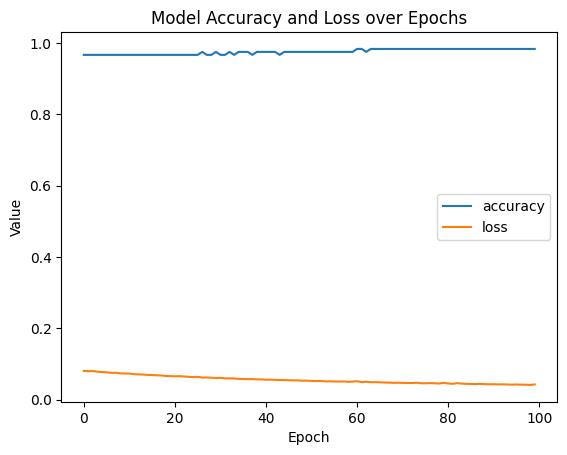

In [36]:
plt.plot(history.history["accuracy"], label='accuracy')
plt.plot(history.history["loss"], label='loss')
plt.title('Model Accuracy and Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()